In [1]:
#imports

import tensorflow as tf 
from vit_keras import vit, utils, visualize
from keras_flops import get_flops


In [2]:
#definicao dos diretorios

test_dir = r'C:\Users\Gabriel\Downloads\dataset_aumentado_384\images\test'
pesos = r"C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\ViT - Experimentos\Experimento 6\model_best_7.h5"

In [3]:
#definicao das configuracoes

image_size = 384
image_shape = (image_size, image_size, 3)
classes = 12

classes_dic ={
    'Codega':'CD',
    'Malvasia Fina':'MF',
    'Malvasia Preta':'MP',
    'Malvasia Rei':'MR',
    'Moscatel Galego':'MG',
    'Mourisco Tinto':'MT',
    'Rabigato':'RG',
    'Tinta Amarela':'TA',
    'Tinta Barroca':'TB',
    'Tinta Roriz':'TR',
    'Tinto Cao':'TC',
    'Touriga Nacional':'TN'
}

classes_num={
    0:'CD',
    1:'MF',
    2:'MP',
    3:'MR',
    4:'MG',
    5:'MT',
    6:'RG',
    7:'TA',
    8:'TB',
    9:'TR',
    10:'TC',
    11:'TN'
}

In [4]:
#carrega o modelo
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalMaxPooling2D


vit_model = vit.vit_b16(
        image_size = image_size,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = classes)


x = tf.keras.layers.Flatten()(vit_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
output = Dense(classes, activation='softmax')(x)
model = tf.keras.models.Model(vit_model.input, output) 
model.load_weights(pesos)

In [5]:
#imprime os flops

flops = get_flops(model, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


C:\Python\lib\site-packages\tensorflow\python\ops\math_ops.py:3832: RuntimeWarning: overflow encountered in long_scalars
  return ops.OpStats("flops", (k * output_count * 2))


FLOPS: 46.2 G


Notebook run using keras: 2.7.0
Found 72 images belonging to 12 classes.
['Codega', 'Malvasia Fina', 'Malvasia Preta', 'Malvasia Rei', 'Moscatel Galego', 'Mourisco Tinto', 'Rabigato', 'Tinta Amarela', 'Tinta Barroca', 'Tinta Roriz', 'Tinto Cao', 'Touriga Nacional']
              precision    recall  f1-score   support

          CD       1.00      0.67      0.80         6
          MF       1.00      0.83      0.91         6
          MP       1.00      1.00      1.00         6
          MR       0.67      1.00      0.80         6
          MG       1.00      1.00      1.00         6
          MT       1.00      1.00      1.00         6
          RG       1.00      1.00      1.00         6
          TA       1.00      1.00      1.00         6
          TB       1.00      1.00      1.00         6
          TR       1.00      1.00      1.00         6
          TC       1.00      1.00      1.00         6
          TN       1.00      1.00      1.00         6

    accuracy                  

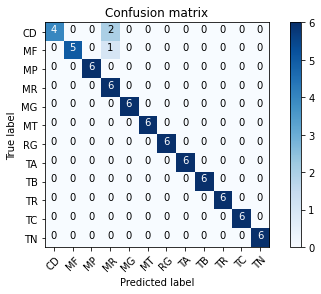

In [6]:
#matriz de confusao 
import os
import tensorflow.keras as keras
from tensorflow.keras.applications import inception_v3 as inc_net
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras import backend as K
from sklearn import metrics
import itertools
print('Notebook run using keras:', keras.__version__)
import random

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def confusion_matrix(test_data_generator, model):
  test_data_generator.reset()
  predictions = model.predict(test_data_generator, steps=test_set.samples)
  # Get most likely class
  predicted_classes = np.argmax(predictions, axis=1)
  true_classes = test_data_generator.classes
  class_labels = list(test_data_generator.class_indices.keys())
  print(class_labels)
  class_labels = [classes_dic[x] for x in class_labels]  

  report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
  cm = metrics.confusion_matrix(true_classes, predicted_classes)
  print(report)
  plot_confusion_matrix(cm, class_labels)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=vit.preprocess_inputs)
test_set = test_datagen.flow_from_directory(test_dir, 
                                            target_size=(image_size, image_size),
                                            class_mode='categorical',
                                            batch_size=1,
                                            shuffle=False)

test_set.reset()
confusion_matrix(test_set, model)

C:\Users\Gabriel\Downloads\dataset_aumentado_384\images\test\Codega\IMG_0320.jpg :
Prediction: MR


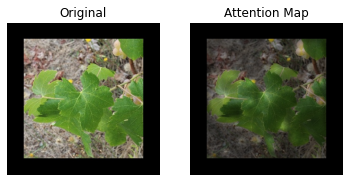

---------------------
C:\Users\Gabriel\Downloads\dataset_aumentado_384\images\test\Codega\IMG_0327.jpg :


KeyboardInterrupt: 

In [7]:
#mapas de atenção 

import pandas as pd
import glob
#metodo que itera pelos arquivos do diretorio salvando a path da imagem e sua respectiva classe

paths = test_set.filepaths

for i, url in enumerate(paths):
  print(url, ':')
  # Get an image and compute the attention map
  image = utils.read(url, image_size)
  attention_map = visualize.attention_map(model=model, image=image)
  print('Prediction:', classes_num[
      model.predict(vit.preprocess_inputs(image)[np.newaxis])[0].argmax()]
  )  # Prediction: Eskimo dog, husky

  # Plot results
  fig, (ax1, ax2) = plt.subplots(ncols=2)
  ax1.axis('off')
  ax2.axis('off')
  ax1.set_title('Original')
  ax2.set_title('Attention Map')
  _ = ax1.imshow(image)
  _ = ax2.imshow(attention_map)
  plt.show()
  print('---------------------')